In [1]:
# this notebook follows on from GROUP_mergeData_filterData_prepForML

<div style='color: FloralWhite; padding: 2rem; background-image: radial-gradient(farthest-corner at 40px 40px,
      #f35 0%, #43e 100%); font-weight: 500'>
<h2 style='padding: 0; margin-bottom: 1rem; margin-top:0;'> NEXT STEPS </h2> 
<li>impute missing values</li>
<li>look at pattern and % missing values for analytes we're interested in for new features</li>
<li>case/control distributions of key analytes {done}</li>
<li>read the stats from Rachel's thesis</li>
<li>one-hot encoding of categorical columns {done} </li>
<li> make features from grad, intercept of linear fit {done}</li>
<li> We are basically geniuses </li>
<li>PCA, try some basic models</li>
    </div>

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
pd.set_option('display.max_rows', 500)

In [3]:
data = pd.read_csv('../Data/big_cats/processed_data/filtered_data_26052021.csv')
data.head()

,ARKS Number,Acute kidney failure,Age at Death,CKD - cause of mortality,CKD - co-morbidity,Date of Birth,Infection,Neoplasia,Neurological,Old Age debility,Respiratory/Cardiovascular,Sex,Species (common name),Trauma,Date,haem: RBC (x 10^12/L),haem: haemoglobin (g/L),haem: HCT (%),haem: Total Protein (refractometer),haem: leukocyte count (x10^9/L),haem: neutrophils (%),haem: neutrophils (band),haem: neutrophils(seg) (x10^9/L),haem: lymphocytes (x10^9/L),haem: lymphocytes (%),haem: monocytes (x10^9/L),haem: monocytes (%),haem: eosinophils (x10^9/L),haem: eosinophils (%),haem: estimated platelets x 10^9/L (Hi),haem: MCV (fL),haem: MCHC (g/L),haem: MCH (pg),biochem: Low USG?,biochem: BUN (mmol/L),biochem: Hypercreatininaemia?,biochem: Creatinine (umol/L),biochem: Total Plasma Protein (g/L),biochem: Serum Albumin (g/L),biochem: Globulins (g/L),biochem: Anaemic? <25,biochem: Haematocrit (%),biochem: Potassium (mmol/L),biochem: Calcium (mmol/L),biochem: Hyperphosphataemia? >2_9 to 3,biochem: Phosphate (mmol/L),biochem: Sodium (mmol/L),biochem: Chloride (mmol/L),biochem: Bicarbonate,biochem: Glucose,biochem: CK (U/L),biochem: ALP (U/L),biochem: ALT (U/L),biochem: AST,biochem: Amylase,biochem: Cholesterol (mmol/L),biochem: Bilirubin,urine: Urine Specific Gravity,urine: Low USG?,urine: Azotaemia?,urine: Urine protein (g/L),urine: urine creatinine (umol/l),urine: Protein:creatinine ratio,urine: Proteinuric UPC greater 0:4,urine: glucose (Multistix),urine: bilirubin (Multistix),urine: ketones (Multistix),urine: blood (Hb -Multistix),urine: pH,urine: protein (Multistix),urine: Positive urine culture,urine: leukocytes (/cumm)x,urine: blood (RBC/ ul) (haematuriax,urine: Lipid,urine: Casts,urine: Epith cells,urine: Crystals,urine: Organisms,urine: Contaminants?,usg_maxed_out,urine: blood haemolysed,Date dt,Date of Birth dt,age at visit,num visits
0,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1987-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,False,27.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,False,trace,nil,nil,nil,6.5,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1987-02-02,1974-01-01,4780 days 00:00:00.000000000,5
1,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-05-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,89.0,NaN,NaN,False,41.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044,False,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,6.0,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1988-05-28,1974-01-01,5261 days 00:00:00.000000000,5
2,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,11.85,True,319.0,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1432.0,NaN,NaN,NaN,NaN,NaN,NaN,1.028,True,True,NaN,NaN,NaN,False,nil,nil,nil,nil,6.5,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1988-06-01,1974-01-01,5265 days 00:00:00.000000000,5
3,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-11-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12.51,False,NaN,70.0,36.0,34.0,False,45.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,102.0,13.0,46.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1988-11-08,1974-01-01,5425 days 00:00:00.000000000,5
4,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1987-02-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
len(data)

1438

In [5]:
missing_dict = dict(data.isna().sum().sort_values(ascending=False))

In [6]:
missing_dict

{'urine: urine creatinine (umol/l)': 1377,
 'urine: Urine protein (g/L)': 1377,
 'urine: Protein:creatinine ratio': 1370,
 'haem: MCH (pg)': 1370,
 'haem: MCV (fL)': 1320,
 'haem: MCHC (g/L)': 1311,
 'haem: neutrophils (band)': 1307,
 'haem: estimated platelets x 10^9/L (Hi)': 1254,
 'haem: eosinophils (%)': 1245,
 'haem: monocytes (%)': 1229,
 'haem: lymphocytes  (%)': 1208,
 'urine: leukocytes (/cumm)x': 1195,
 'urine: blood (RBC/ ul) (haematuriax': 1190,
 'haem: Total Protein (refractometer)': 1189,
 'haem: neutrophils (%)': 1151,
 'haem: eosinophils  (x10^9/L)': 1149,
 'haem: RBC (x 10^12/L)': 1148,
 'haem: neutrophils(seg) (x10^9/L)': 1127,
 'haem: monocytes (x10^9/L)': 1108,
 'biochem: Amylase': 1099,
 'haem: lymphocytes (x10^9/L)': 1093,
 'haem: haemoglobin (g/L)': 1005,
 'haem: leukocyte count (x10^9/L)': 992,
 'haem: HCT (%)': 983,
 'biochem: Bicarbonate': 887,
 'biochem: Cholesterol (mmol/L)': 870,
 'urine: bilirubin (Multistix)': 841,
 'urine: ketones (Multistix)': 827,
 'ur

In [7]:
missing_percent = data.isna().sum().sort_values(ascending=False).divide(len(data))

In [8]:
dict(missing_percent)

{'urine: urine creatinine (umol/l)': 0.9575799721835884,
 'urine: Urine protein (g/L)': 0.9575799721835884,
 'urine: Protein:creatinine ratio': 0.952712100139082,
 'haem: MCH (pg)': 0.952712100139082,
 'haem: MCV (fL)': 0.9179415855354659,
 'haem: MCHC (g/L)': 0.911682892906815,
 'haem: neutrophils (band)': 0.9089012517385258,
 'haem: estimated platelets x 10^9/L (Hi)': 0.8720445062586927,
 'haem: eosinophils (%)': 0.8657858136300417,
 'haem: monocytes (%)': 0.8546592489568846,
 'haem: lymphocytes  (%)': 0.8400556328233658,
 'urine: leukocytes (/cumm)x': 0.8310152990264256,
 'urine: blood (RBC/ ul) (haematuriax': 0.827538247566064,
 'haem: Total Protein (refractometer)': 0.8268428372739917,
 'haem: neutrophils (%)': 0.8004172461752433,
 'haem: eosinophils  (x10^9/L)': 0.7990264255910987,
 'haem: RBC (x 10^12/L)': 0.7983310152990264,
 'haem: neutrophils(seg) (x10^9/L)': 0.7837273991655076,
 'haem: monocytes (x10^9/L)': 0.7705146036161336,
 'biochem: Amylase': 0.7642559109874826,
 'haem:

In [9]:
data_more_than1visit = data[data['num visits'] >1 ]
len(data_more_than1visit)

1404

In [10]:
dict(data_more_than1visit.isna().sum().sort_values(ascending=False).divide(len(data_more_than1visit)))

{'urine: urine creatinine (umol/l)': 0.9572649572649573,
 'urine: Urine protein (g/L)': 0.9572649572649573,
 'haem: MCH (pg)': 0.9529914529914529,
 'urine: Protein:creatinine ratio': 0.9522792022792023,
 'haem: MCV (fL)': 0.9173789173789174,
 'haem: MCHC (g/L)': 0.9109686609686609,
 'haem: neutrophils (band)': 0.9088319088319088,
 'haem: estimated platelets x 10^9/L (Hi)': 0.8696581196581197,
 'haem: eosinophils (%)': 0.8646723646723646,
 'haem: monocytes (%)': 0.8532763532763533,
 'haem: lymphocytes  (%)': 0.8383190883190883,
 'urine: leukocytes (/cumm)x': 0.8297720797720798,
 'urine: blood (RBC/ ul) (haematuriax': 0.8254985754985755,
 'haem: Total Protein (refractometer)': 0.8240740740740741,
 'haem: neutrophils (%)': 0.7977207977207977,
 'haem: eosinophils  (x10^9/L)': 0.7962962962962963,
 'haem: RBC (x 10^12/L)': 0.7948717948717948,
 'haem: neutrophils(seg) (x10^9/L)': 0.7799145299145299,
 'haem: monocytes (x10^9/L)': 0.7670940170940171,
 'biochem: Amylase': 0.7606837606837606,
 'h

In [11]:
# look at pattern of missing values for key analytes

In [12]:
key_features = ['biochem: Creatinine (umol/L)', 'biochem: BUN (mmol/L)', 'urine: Urine Specific Gravity']

In [13]:
data_more_than1visit['num key features missing'] = data_more_than1visit[key_features].isna().sum(axis=1)

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
data_more_than1visit

,ARKS Number,Acute kidney failure,Age at Death,CKD - cause of mortality,CKD - co-morbidity,Date of Birth,Infection,Neoplasia,Neurological,Old Age debility,Respiratory/Cardiovascular,Sex,Species (common name),Trauma,Date,haem: RBC (x 10^12/L),haem: haemoglobin (g/L),haem: HCT (%),haem: Total Protein (refractometer),haem: leukocyte count (x10^9/L),haem: neutrophils (%),haem: neutrophils (band),haem: neutrophils(seg) (x10^9/L),haem: lymphocytes (x10^9/L),haem: lymphocytes (%),haem: monocytes (x10^9/L),haem: monocytes (%),haem: eosinophils (x10^9/L),haem: eosinophils (%),haem: estimated platelets x 10^9/L (Hi),haem: MCV (fL),haem: MCHC (g/L),haem: MCH (pg),biochem: Low USG?,biochem: BUN (mmol/L),biochem: Hypercreatininaemia?,biochem: Creatinine (umol/L),biochem: Total Plasma Protein (g/L),biochem: Serum Albumin (g/L),biochem: Globulins (g/L),biochem: Anaemic? <25,biochem: Haematocrit (%),biochem: Potassium (mmol/L),biochem: Calcium (mmol/L),biochem: Hyperphosphataemia? >2_9 to 3,biochem: Phosphate (mmol/L),biochem: Sodium (mmol/L),biochem: Chloride (mmol/L),biochem: Bicarbonate,biochem: Glucose,biochem: CK (U/L),biochem: ALP (U/L),biochem: ALT (U/L),biochem: AST,biochem: Amylase,biochem: Cholesterol (mmol/L),biochem: Bilirubin,urine: Urine Specific Gravity,urine: Low USG?,urine: Azotaemia?,urine: Urine protein (g/L),urine: urine creatinine (umol/l),urine: Protein:creatinine ratio,urine: Proteinuric UPC greater 0:4,urine: glucose (Multistix),urine: bilirubin (Multistix),urine: ketones (Multistix),urine: blood (Hb -Multistix),urine: pH,urine: protein (Multistix),urine: Positive urine culture,urine: leukocytes (/cumm)x,urine: blood (RBC/ ul) (haematuriax,urine: Lipid,urine: Casts,urine: Epith cells,urine: Crystals,urine: Organisms,urine: Contaminants?,usg_maxed_out,urine: blood haemolysed,Date dt,Date of Birth dt,age at visit,num visits,num key features missing
0,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1987-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,False,27.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,False,trace,nil,nil,nil,6.5,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1987-02-02,1974-01-01,4780 days 00:00:00.000000000,5,3
1,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-05-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,89.0,NaN,NaN,False,41.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044,False,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,6.0,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1988-05-28,1974-01-01,5261 days 00:00:00.000000000,5,2
2,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,11.85,True,319.0,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1432.0,NaN,NaN,NaN,NaN,NaN,NaN,1.028,True,True,NaN,NaN,NaN,False,nil,nil,nil,nil,6.5,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1988-06-01,1974-01-01,5265 days 00:00:00.000000000,5,0
3,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-11-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12.51,False,NaN,70.0,36.0,34.0,False,45.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,102.0,13.0,46.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1988-11-08,1974-01-01,5425 days 00:00:00.000000000,5,2
4,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1987-02-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

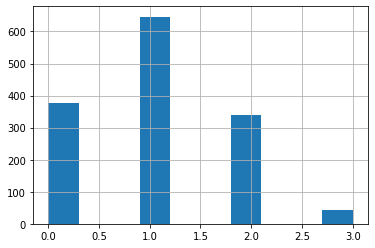

In [15]:
data_more_than1visit['num key features missing'].hist()

In [16]:
# look at cases and controls

In [17]:
cases = data_more_than1visit[data_more_than1visit['CKD - cause of mortality'] == True]
controls = data_more_than1visit[data_more_than1visit['CKD - cause of mortality'] == False]

In [18]:
len(cases)

650

In [19]:
len(controls)

754

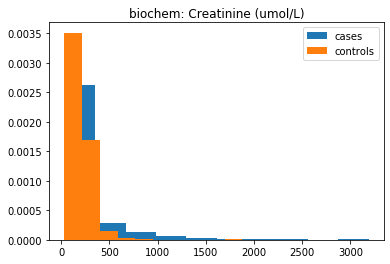

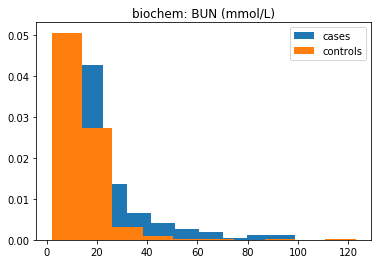

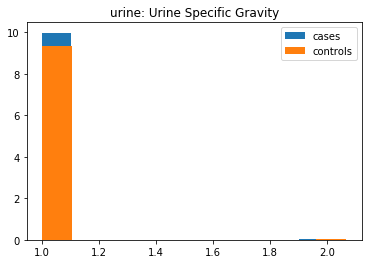

In [20]:
for feature in key_features:
    fig, ax0 = plt.subplots(nrows=1, ncols=1)
    ax0.hist(cases[feature], density=True, histtype='bar', label='cases')
    ax0.hist(controls[feature], density=True, histtype='bar', label='controls')
    ax0.legend(prop={'size': 10})
    ax0.set_title(feature)

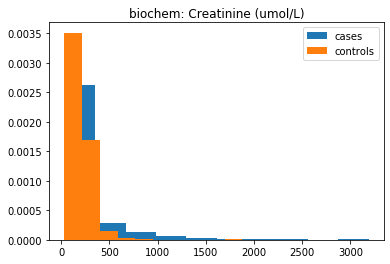

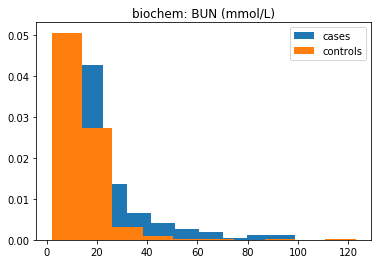

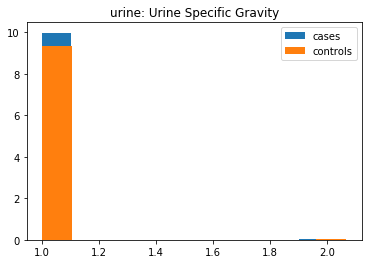

In [21]:
for feature in key_features:
    plt.hist(cases[feature], label = 'cases', stacked=True, histtype='bar', density = True)
    plt.hist(controls[feature], label = 'controls', stacked=True, histtype='bar', density = True)
    plt.title(feature)
    plt.legend()
    plt.show()

<div style='color: FloralWhite; padding: 2rem; background-image: radial-gradient(farthest-corner at 40px 40px,
      #008080 0%, #43e 100%); font-weight: 500'>
<h2 style='padding: 0; margin-bottom: 1rem; margin-top:0;'> PREPARING FOR PCA </h2> 
<li>Choose features based on % missing</li>
<li> Make sure all chosen features are clean (some have less than signs) {done}</li>
<li> convert dtypes to be what we think they should be  {done} </li>
<li> Feature engineering of ordinal variables {done}</li>
<li>Impute remaining contnuous features {done} </li>
<li> Clean species {it's fine} </li>
<li> One hot encode {done} </li>
<li> Normalise features (min/max scaling) {done}</li>
<li> PC motherfucking A WE ARE HEREEEEE </li>

</div>

## Clean some features of things we don't want

In [22]:
for col in list(data_more_than1visit.select_dtypes(include=['object']).columns):
    print(col)
    print(data_more_than1visit[col].unique())
    print()

ARKS Number
['Koyukon' '780127' '800014MZ' '920519' '980010' '980014' '999028'
 'A39042' 'A50003' 'A79192' '780049' '900959' '930045' '960093' '990948'
 'K0095' '200003' '670005' '720019' '730023' '730024' '750011' '760022'
 '770005' '770006' '780001' '790025' '790026' '790035' '790036' '790036MZ'
 '790037' '790038' '800015' '800017' '800029' '810034' '810041' '810044'
 '810053' '810057' '820014' '820029' '830014' '830025' '840019' '840025'
 '840026' '840033' '840034' '850007' '850083' '850101' '860057' '860081'
 '870008' '880014' '880045' '880074' '880075' '890000' '890004' '890114'
 '890254' '890290' '900248' '900249' '900484' '900485' '910080' '910517'
 '920185' '920259' '920260' '920453' '920534' '921189' '921430' '930228'
 '930229' '930230' '930430' '930431' '940101' '950061' '950062' '950075'
 '950076' '950077' '950078' '950079' '950908' '960035' '960069' '960094'
 '960095' '960142' '960259' '960461' '960996' '970005' '970007' '970008'
 '970620' '980004' '980081' '980123' '980508

In [23]:
data_more_than1visit['haem: estimated platelets x 10^9/L (Hi)'] = data_more_than1visit['haem: estimated platelets x 10^9/L (Hi)'].replace({'14/hpf':np.nan}).astype('float')
data_more_than1visit['biochem: Bilirubin'] = data_more_than1visit['biochem: Bilirubin'].str.replace('<','').astype('float')



/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Make booleans 1, 0

In [24]:
bool_to_0_1 =['biochem: Low USG?', 'biochem: Hypercreatininaemia?','biochem: Anaemic? <25', 
              'biochem: Hyperphosphataemia? >2_9 to 3', 'urine: Low USG?', 'urine: Azotaemia?', 
              'urine: Proteinuric UPC  greater 0:4', 'urine: Positive urine culture', 
              'urine: Lipid', 'urine: Casts', 'urine: Epith cells', 'urine: Crystals', 
              'urine: Organisms', 'urine: Contaminants?']

In [25]:
data_more_than1visit[bool_to_0_1] = data_more_than1visit[bool_to_0_1].replace({True: 1, False: 0})

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


#### Convert some ages to days to make them continuous

In [26]:
data_more_than1visit['age at visit days'] = pd.to_timedelta(data_more_than1visit['age at visit']).dt.days
data_more_than1visit['Age at Death days'] = pd.to_timedelta(data_more_than1visit['Age at Death']).dt.days

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Feature engineering of ordinal variables

In [27]:
ordinals = ['urine: bilirubin (Multistix)', 'urine: ketones (Multistix)', 'urine: glucose (Multistix)', 
            'urine: blood (Hb -Multistix)', 'urine: pH', 'urine: protein (Multistix)']

### urine: bilirubin (Multistix)

In [28]:
bilirubin_dict = {'nil': 0, 'negative': 0, 'trace': 0, '1+': 20, '2+': 40, '3+': 100, '4+': 100} # this scaling came from ruth's feline medicine book
feature_dict = bilirubin_dict

In [29]:
feature = 'urine: bilirubin (Multistix)'
data_more_than1visit.loc[:,feature] = data_more_than1visit[feature].replace(feature_dict).copy()

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [30]:
data_more_than1visit[feature].value_counts()

0.0      554
20.0      19
100.0     11
40.0       4
Name: urine: bilirubin (Multistix), dtype: int64

### urine: ketones (Multistix)

In [31]:
feature = ordinals[1]
data_more_than1visit[[feature]][feature].value_counts()

nil         528
negative     23
1+           16
3+           13
trace        11
2+            8
4+            2
Name: urine: ketones (Multistix), dtype: int64

In [32]:
ketones_dict = {'nil': 0, 'negative': 0, 'trace': 5, '1+': 15, '2+': 40, '3+': 80, '4+': 160}
feature_dict = ketones_dict

In [33]:
data_more_than1visit.loc[:,feature] = data_more_than1visit[feature].replace(feature_dict).copy()
data_more_than1visit[feature].value_counts()

0.0      551
15.0      16
80.0      13
5.0       11
40.0       8
160.0      2
Name: urine: ketones (Multistix), dtype: int64

### urine: glucose (Multistix)

In [34]:
feature = ordinals[2]
data_more_than1visit[[feature]][feature].value_counts()

nil         527
trace        26
negative     24
2+           16
1+            8
4+            6
3+            6
Name: urine: glucose (Multistix), dtype: int64

In [35]:
glucose_dict = {'nil': 0, 'negative': 0, 'trace': 5, '1+': 15, '2+': 30, '3+': 60, '4+': 110}
feature_dict = glucose_dict
data_more_than1visit.loc[:,feature] = data_more_than1visit[feature].replace(feature_dict).copy()
data_more_than1visit[feature].value_counts()

0.0      551
5.0       26
30.0      16
15.0       8
110.0      6
60.0       6
Name: urine: glucose (Multistix), dtype: int64

### urine: blood (Hb -Multistix)
Assumption that all values are hemolysed unless there is a trace amount of intact red blood cells.  CHECK WITH VET.  
- Assumed that trace hemolyzed is the same as non-hemalysed trace (10)
- Guessed 4+, 5+ are 400

In [36]:
feature = ordinals[3]
data_more_than1visit[[feature]][feature].value_counts()

nil            213
4+             117
3+              97
2+              68
trace           67
1+              54
negative         7
0                2
5+               1
12               1
moderate 80      1
Name: urine: blood (Hb -Multistix), dtype: int64

In [37]:
blood_dict = {'nil': 0, 'negative': 0, 'trace': 10, '1+': 25, '2+': 80, '3+': 200, '4+': 400, '5+':500, '12':12, 'moderate 80': 80}
feature_dict = blood_dict
data_more_than1visit.loc[:,feature] = data_more_than1visit[feature].replace(feature_dict).copy()
data_more_than1visit[feature].value_counts()

0      220
400    117
200     97
80      69
10      67
25      54
0        2
500      1
12       1
Name: urine: blood (Hb -Multistix), dtype: int64

In [38]:
#data_more_than1visit[data_more_than1visit['urine: blood haemolysed']==1]

### urine: pH (nothing to do here)

In [39]:
feature = ordinals[4]
data_more_than1visit[[feature]][feature].value_counts()

6.0    219
6.5    127
5.0     64
7.0     61
8.5     51
7.5     43
8.0     37
9.0     30
5.5     14
8.8      1
6.2      1
Name: urine: pH, dtype: int64

### urine: protein (Multistix)

In [40]:
feature = ordinals[5]
data_more_than1visit[[feature]][feature].value_counts()

1+          215
2+          183
3+          117
trace        59
4+           45
nil          45
negative      6
Name: urine: protein (Multistix), dtype: int64

In [41]:
protein_dict = {'nil': 0, 'negative': 0, 'trace': 10, '1+': 30, '2+': 100, '3+': 300, '4+': 2000}
feature_dict = protein_dict
data_more_than1visit.loc[:,feature] = data_more_than1visit[feature].replace(feature_dict).copy()
data_more_than1visit[feature].value_counts()

30.0      215
100.0     183
300.0     117
10.0       59
0.0        51
2000.0     45
Name: urine: protein (Multistix), dtype: int64

## Min/max scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [43]:
scale_list = list(data_more_than1visit.describe().columns)
scale_list.remove('num visits')
scale_list.remove('num key features missing')
scale_list.remove('usg_maxed_out')
scale_list.remove('urine: blood haemolysed')
scale_list

['haem: RBC (x 10^12/L)',
 'haem: haemoglobin (g/L)',
 'haem: HCT (%)',
 'haem: Total Protein (refractometer)',
 'haem: leukocyte count (x10^9/L)',
 'haem: neutrophils (%)',
 'haem: neutrophils (band)',
 'haem: neutrophils(seg) (x10^9/L)',
 'haem: lymphocytes (x10^9/L)',
 'haem: lymphocytes  (%)',
 'haem: monocytes (x10^9/L)',
 'haem: monocytes (%)',
 'haem: eosinophils  (x10^9/L)',
 'haem: eosinophils (%)',
 'haem: estimated platelets x 10^9/L (Hi)',
 'haem: MCV (fL)',
 'haem: MCHC (g/L)',
 'haem: MCH (pg)',
 'biochem: Low USG?',
 'biochem: BUN (mmol/L)',
 'biochem: Hypercreatininaemia?',
 'biochem: Creatinine (umol/L)',
 'biochem: Total Plasma Protein (g/L)',
 'biochem: Serum Albumin (g/L)',
 'biochem: Globulins (g/L)',
 'biochem: Anaemic? <25',
 'biochem: Haematocrit (%)',
 'biochem: Potassium (mmol/L)',
 'biochem: Calcium (mmol/L)',
 'biochem: Hyperphosphataemia? >2_9 to 3',
 'biochem: Phosphate (mmol/L)',
 'biochem: Sodium (mmol/L)',
 'biochem: Chloride (mmol/L)',
 'biochem: Bicar

In [44]:
data_scaled = data_more_than1visit.copy()
data_scaled[scale_list] = min_max_scaler.fit_transform(data_scaled[scale_list])

In [45]:
data_scaled.describe()

,haem: RBC (x 10^12/L),haem: haemoglobin (g/L),haem: HCT (%),haem: Total Protein (refractometer),haem: leukocyte count (x10^9/L),haem: neutrophils (%),haem: neutrophils (band),haem: neutrophils(seg) (x10^9/L),haem: lymphocytes (x10^9/L),haem: lymphocytes (%),haem: monocytes (x10^9/L),haem: monocytes (%),haem: eosinophils (x10^9/L),haem: eosinophils (%),haem: estimated platelets x 10^9/L (Hi),haem: MCV (fL),haem: MCHC (g/L),haem: MCH (pg),biochem: Low USG?,biochem: BUN (mmol/L),biochem: Hypercreatininaemia?,biochem: Creatinine (umol/L),biochem: Total Plasma Protein (g/L),biochem: Serum Albumin (g/L),biochem: Globulins (g/L),biochem: Anaemic? <25,biochem: Haematocrit (%),biochem: Potassium (mmol/L),biochem: Calcium (mmol/L),biochem: Hyperphosphataemia? >2_9 to 3,biochem: Phosphate (mmol/L),biochem: Sodium (mmol/L),biochem: Chloride (mmol/L),biochem: Bicarbonate,biochem: Glucose,biochem: CK (U/L),biochem: ALP (U/L),biochem: ALT (U/L),biochem: AST,biochem: Amylase,biochem: Cholesterol (mmol/L),biochem: Bilirubin,urine: Urine Specific Gravity,urine: Low USG?,urine: Azotaemia?,urine: Urine protein (g/L),urine: urine creatinine (umol/l),urine: Protein:creatinine ratio,urine: Proteinuric UPC greater 0:4,urine: glucose (Multistix),urine: bilirubin (Multistix),urine: ketones (Multistix),urine: pH,urine: protein (Multistix),urine: Positive urine culture,urine: Lipid,urine: Casts,urine: Epith cells,urine: Crystals,urine: Organisms,urine: Contaminants?,usg_maxed_out,urine: blood haemolysed,num visits,num key features missing,age at visit days,Age at Death days
count,288.000000,430.000000,452.000000,247.000000,443.000000,284.000000,128.000000,309.000000,342.000000,227.000000,327.000000,206.000000,286.000000,190.000000,182.000000,116.000000,125.000000,66.000000,1046.000000,1026.000000,1046.000000,1024.000000,1021.000000,982.000000,972.000000,1046.000000,922.000000,855.000000,862.000000,1046.000000,876.000000,841.000000,777.000000,542.000000,718.000000,894.000000,904.000000,977.000000,903.000000,336.000000,554.000000,726.000000,710.000000,750.00000,750.000000,60.000000,60.000000,67.000000,750.000000,613.000000,588.000000,601.000000,648.000000,670.000000,750.000000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1282.000000
mean,0.489518,0.126871,0.608306,0.625479,0.217276,0.720527,0.237482,0.257142,0.187373,0.344356,0.099218,0.179612,0.106606,0.139158,0.354234,0.137834,0.659664,0.389141,0.172084,0.132686,0.118547,0.072759,0.328978,0.435595,0.344322,0.024857,0.500398,0.064495,0.484615,0.004780,0.160190,0.464069,0.473659,0.396510,0.013795,0.009643,0.028877,0.020796,0.025298,0.309011,0.065800,0.031542,0.040238,0.36000,0.094667,0.019503,0.281170,0.044411,0.018667,0.025953,0.027891,0.020539,0.409144,0.112269,0.045333,0.04000,0.046667,0.050667,0.125333,0.117333,0.037333,0.123219,0.005698,16.452991,1.034188,0.431212,0.583751
std,0.178749,0.066192,0.156595,0.110017,0.135100,0.145121,0.160098,0.184814,0.136175,0.220973,0.110570,0.134156,0.131745,0.130418,0.155720,0.116267,0.111129,0.219858,0.377634,0.112928,0.323409,0.076838,0.086193,0.081357,0.097270,0.155762,0.138303,0.037119,0.058639,0.069006,0.094528,0.077585,0.101875,0.123942,0.037194,0.048599,0.062793,0.047263,0.050098,0.212748,0.046465,0.065348,0.061559,0.48032,0.292949,0.129521,0.204342,0.123339,0.135435,0.119673,0.142636,0.097021,0.267192,0.243587,0.208173,0.19609,0.211065,0.219462,0.331317,0.322032,0.189704,0.328806,0.075297,11.803448,0.793038,0.218326,0.195104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

## One hot encoding

In [46]:
features_to_one_hot_encode = ['Sex', 'Species (common name)']

In [47]:
data_scaled = pd.get_dummies(data_scaled, columns = features_to_one_hot_encode)

In [48]:
# drop the male sex column (we don't need both)
data_scaled.drop(columns=['Sex_male'], inplace = True)

## Mkae the dtypes what we want them to be

In [49]:
data_scaled.select_dtypes(include=['object']).columns

Index(['ARKS Number', 'Age at Death', 'Date  of Birth', 'Date',
       'urine: blood (Hb -Multistix)', 'urine: leukocytes (/cumm)x',
       'urine: blood (RBC/ ul) (haematuriax', 'Date dt', 'Date of Birth dt',
       'age at visit'],
      dtype='object')

In [50]:
data_scaled['urine: blood (Hb -Multistix)'].value_counts()

0      220
400    117
200     97
80      69
10      67
25      54
0        2
500      1
12       1
Name: urine: blood (Hb -Multistix), dtype: int64

# Make data trajectories of visits
For each column calculate a linear fit and use the gradient as the feature

In [51]:
data_scaled.sort_values(['ARKS Number', 'Date']).head()

,ARKS Number,Acute kidney failure,Age at Death,CKD - cause of mortality,CKD - co-morbidity,Date of Birth,Infection,Neoplasia,Neurological,Old Age debility,Respiratory/Cardiovascular,Trauma,Date,haem: RBC (x 10^12/L),haem: haemoglobin (g/L),haem: HCT (%),haem: Total Protein (refractometer),haem: leukocyte count (x10^9/L),haem: neutrophils (%),haem: neutrophils (band),haem: neutrophils(seg) (x10^9/L),haem: lymphocytes (x10^9/L),haem: lymphocytes (%),haem: monocytes (x10^9/L),haem: monocytes (%),haem: eosinophils (x10^9/L),haem: eosinophils (%),haem: estimated platelets x 10^9/L (Hi),haem: MCV (fL),haem: MCHC (g/L),haem: MCH (pg),biochem: Low USG?,biochem: BUN (mmol/L),biochem: Hypercreatininaemia?,biochem: Creatinine (umol/L),biochem: Total Plasma Protein (g/L),biochem: Serum Albumin (g/L),biochem: Globulins (g/L),biochem: Anaemic? <25,biochem: Haematocrit (%),biochem: Potassium (mmol/L),biochem: Calcium (mmol/L),biochem: Hyperphosphataemia? >2_9 to 3,biochem: Phosphate (mmol/L),biochem: Sodium (mmol/L),biochem: Chloride (mmol/L),biochem: Bicarbonate,biochem: Glucose,biochem: CK (U/L),biochem: ALP (U/L),biochem: ALT (U/L),biochem: AST,biochem: Amylase,biochem: Cholesterol (mmol/L),biochem: Bilirubin,urine: Urine Specific Gravity,urine: Low USG?,urine: Azotaemia?,urine: Urine protein (g/L),urine: urine creatinine (umol/l),urine: Protein:creatinine ratio,urine: Proteinuric UPC greater 0:4,urine: glucose (Multistix),urine: bilirubin (Multistix),urine: ketones (Multistix),urine: blood (Hb -Multistix),urine: pH,urine: protein (Multistix),urine: Positive urine culture,urine: leukocytes (/cumm)x,urine: blood (RBC/ ul) (haematuriax,urine: Lipid,urine: Casts,urine: Epith cells,urine: Crystals,urine: Organisms,urine: Contaminants?,usg_maxed_out,urine: blood haemolysed,Date dt,Date of Birth dt,age at visit,num visits,num key features missing,age at visit days,Age at Death days,Sex_female,Species (common name)_African Lion,Species (common name)_Asiatic Lion,Species (common name)_Bengal Tiger,Species (common name)_Bengal Tiger (white),Species (common name)_Bobcat,Species (common name)_Caracal,Species (common name)_Cheetah,Species (common name)_Clouded Leopard,Species (common name)_Cougar,Species (common name)_Fishing Cat,Species (common name)_Jaguar,Species (common name)_Jaguarundi,Species (common name)_Leopard,Species (common name)_Leopard Cat,Species (common name)_Lion,Species (common name)_Northern (Canadian) Lynx,Species (common name)_Ocelot,Species (common name)_Persian Leopard,Species (common name)_Serval,Species (common name)_Siberian Tiger,Species (common name)_Snow Leopard,Species (common name)_Sumatran Tiger,Species (common name)_Temminck's Golden Cat,Species (common name)_Tiger,Species (common name)_Tiger (White)
103,200003,False,22y0m19d,False,True,1993-01-01,False,False,False,True,False,False,2010-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.08843,0.0,0.091514,0.365854,0.426667,0.4,0.0,0.509091,0.059524,0.496078,0.0,0.08913,0.451613,0.5,0.377049,NaN,0.001453,0.028292,0.060868,0.033739,NaN,0.077632,0.011834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2010-06-25,1993-01-01,6384 days 00:00:00.000000000,5,1,0.677673,0.875342,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
104,200003,False,22y0m19d,False,True,1993-01-01,False,False,False,True,False,False,2012-07-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065543,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2012-07-13,1993-01-01,7133 days 00:00:00.000000000,5,2,0.757193,0.875342,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
105,200003,False,22y0m19d,False,True,1993-01-01,False,False,False,True,False,False,2013-01-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [52]:
cols_we_want = list(data_scaled.select_dtypes(include=['float', 'int']).columns)
cols_we_want.remove('num visits')
cols_we_want.remove('num key features missing')
cols_we_want.remove('Age at Death days')
cols_we_want

['haem: RBC (x 10^12/L)',
 'haem: haemoglobin (g/L)',
 'haem: HCT (%)',
 'haem: Total Protein (refractometer)',
 'haem: leukocyte count (x10^9/L)',
 'haem: neutrophils (%)',
 'haem: neutrophils (band)',
 'haem: neutrophils(seg) (x10^9/L)',
 'haem: lymphocytes (x10^9/L)',
 'haem: lymphocytes  (%)',
 'haem: monocytes (x10^9/L)',
 'haem: monocytes (%)',
 'haem: eosinophils  (x10^9/L)',
 'haem: eosinophils (%)',
 'haem: estimated platelets x 10^9/L (Hi)',
 'haem: MCV (fL)',
 'haem: MCHC (g/L)',
 'haem: MCH (pg)',
 'biochem: Low USG?',
 'biochem: BUN (mmol/L)',
 'biochem: Hypercreatininaemia?',
 'biochem: Creatinine (umol/L)',
 'biochem: Total Plasma Protein (g/L)',
 'biochem: Serum Albumin (g/L)',
 'biochem: Globulins (g/L)',
 'biochem: Anaemic? <25',
 'biochem: Haematocrit (%)',
 'biochem: Potassium (mmol/L)',
 'biochem: Calcium (mmol/L)',
 'biochem: Hyperphosphataemia? >2_9 to 3',
 'biochem: Phosphate (mmol/L)',
 'biochem: Sodium (mmol/L)',
 'biochem: Chloride (mmol/L)',
 'biochem: Bicar

In [53]:
from sklearn.linear_model import LinearRegression

feature_df = pd.DataFrame()
cats = data_scaled['ARKS Number'].unique()


for cat in cats:
    cat_data = data_scaled[data_scaled['ARKS Number'] == cat]
    gradient_dict = {}
    gradient_dict['ARKS Number'] = cat
   
    for col in cols_we_want:
        # drop nans
        cat_data_subset = cat_data.dropna(subset = [col])
        # check for 2 values
        if len(cat_data_subset) >= 2:
            # do the linear fit
            X = cat_data_subset['age at visit days'].values.reshape(-1, 1)
            y = cat_data_subset[col].values.reshape(-1, 1)
            reg = LinearRegression().fit(X, y)
            grad = reg.coef_
            intercept = reg.intercept_
            gradient_dict[col + '_grad'] = grad[0][0]
            gradient_dict[col + '_intercept'] = intercept[0]
            
        else:
            # set gradient to nan
            gradient_dict[col + '_grad'] = np.nan
            gradient_dict[col + '_intercept'] = np.nan
    
    # add this cat to the df
    feature_df = feature_df.append(gradient_dict, ignore_index = True)

In [54]:
feature_df

,ARKS Number,age at visit days_grad,age at visit days_intercept,biochem: ALP (U/L)_grad,biochem: ALP (U/L)_intercept,biochem: ALT (U/L)_grad,biochem: ALT (U/L)_intercept,biochem: AST_grad,biochem: AST_intercept,biochem: Amylase_grad,biochem: Amylase_intercept,biochem: Anaemic? <25_grad,biochem: Anaemic? <25_intercept,biochem: BUN (mmol/L)_grad,biochem: BUN (mmol/L)_intercept,biochem: Bicarbonate_grad,biochem: Bicarbonate_intercept,biochem: Bilirubin_grad,biochem: Bilirubin_intercept,biochem: CK (U/L)_grad,biochem: CK (U/L)_intercept,biochem: Calcium (mmol/L)_grad,biochem: Calcium (mmol/L)_intercept,biochem: Chloride (mmol/L)_grad,biochem: Chloride (mmol/L)_intercept,biochem: Cholesterol (mmol/L)_grad,biochem: Cholesterol (mmol/L)_intercept,biochem: Creatinine (umol/L)_grad,biochem: Creatinine (umol/L)_intercept,biochem: Globulins (g/L)_grad,biochem: Globulins (g/L)_intercept,biochem: Glucose_grad,biochem: Glucose_intercept,biochem: Haematocrit (%)_grad,biochem: Haematocrit (%)_intercept,biochem: Hypercreatininaemia?_grad,biochem: Hypercreatininaemia?_intercept,biochem: Hyperphosphataemia? >2_9 to 3_grad,biochem: Hyperphosphataemia? >2_9 to 3_intercept,biochem: Low USG?_grad,biochem: Low USG?_intercept,biochem: Phosphate (mmol/L)_grad,biochem: Phosphate (mmol/L)_intercept,biochem: Potassium (mmol/L)_grad,biochem: Potassium (mmol/L)_intercept,biochem: Serum Albumin (g/L)_grad,biochem: Serum Albumin (g/L)_intercept,biochem: Sodium (mmol/L)_grad,biochem: Sodium (mmol/L)_intercept,biochem: Total Plasma Protein (g/L)_grad,biochem: Total Plasma Protein (g/L)_intercept,haem: HCT (%)_grad,haem: HCT (%)_intercept,haem: MCH (pg)_grad,haem: MCH (pg)_intercept,haem: MCHC (g/L)_grad,haem: MCHC (g/L)_intercept,haem: MCV (fL)_grad,haem: MCV (fL)_intercept,haem: RBC (x 10^12/L)_grad,haem: RBC (x 10^12/L)_intercept,haem: Total Protein (refractometer)_grad,haem: Total Protein (refractometer)_intercept,haem: eosinophils (x10^9/L)_grad,haem: eosinophils (x10^9/L)_intercept,haem: eosinophils (%)_grad,haem: eosinophils (%)_intercept,haem: estimated platelets x 10^9/L (Hi)_grad,haem: estimated platelets x 10^9/L (Hi)_intercept,haem: haemoglobin (g/L)_grad,haem: haemoglobin (g/L)_intercept,haem: leukocyte count (x10^9/L)_grad,haem: leukocyte count (x10^9/L)_intercept,haem: lymphocytes (%)_grad,haem: lymphocytes (%)_intercept,haem: lymphocytes (x10^9/L)_grad,haem: lymphocytes (x10^9/L)_intercept,haem: monocytes (%)_grad,haem: monocytes (%)_intercept,haem: monocytes (x10^9/L)_grad,haem: monocytes (x10^9/L)_intercept,haem: neutrophils (%)_grad,haem: neutrophils (%)_intercept,haem: neutrophils (band)_grad,haem: neutrophils (band)_intercept,haem: neutrophils(seg) (x10^9/L)_grad,haem: neutrophils(seg) (x10^9/L)_intercept,urine: Azotaemia?_grad,urine: Azotaemia?_intercept,urine: Casts_grad,urine: Casts_intercept,urine: Contaminants?_grad,urine: Contaminants?_intercept,urine: Crystals_grad,urine: Crystals_intercept,urine: Epith cells_grad,urine: Epith cells_intercept,urine: Lipid_grad,urine: Lipid_intercept,urine: Low USG?_grad,urine: Low USG?_intercept,urine: Organisms_grad,urine: Organisms_intercept,urine: Positive urine culture_grad,urine: Positive urine culture_intercept,urine: Protein:creatinine ratio_grad,urine: Protein:creatinine ratio_intercept,urine: Proteinuric UPC greater 0:4_grad,urine: Proteinuric UPC greater 0:4_intercept,urine: Urine Specific Gravity_grad,urine: Urine Specific Gravity_intercept,urine: Urine protein (g/L)_grad,urine: Urine protein (g/L)_intercept,urine: bilirubin (Multistix)_grad,urine: bilirubin (Multistix)_intercept,urine: blood haemolysed_grad,urine: blood haemolysed_intercept,urine: glucose (Multistix)_grad,urine: glucose (Multistix)_intercept,urine: ketones (Multistix)_grad,urine: ketones (Multistix)_intercept,urine: pH_grad,urine: pH_intercept,urine: protein (Multistix)_grad,urine: protein (Multistix)_intercept,urine: urine creatinine (umol/l)_grad,urine: urine creatinine (umol/l)_intercept,usg_maxed_out_grad,usg_maxed_out

### Make demographics df

In [55]:
dem_list = ['ARKS Number',
 'CKD - cause of mortality',
 'Species (common name)_African Lion',
 'Species (common name)_Asiatic Lion',
 'Species (common name)_Bengal Tiger',
 'Species (common name)_Bengal Tiger (white)',
 'Species (common name)_Bobcat',
 'Species (common name)_Caracal',
 'Species (common name)_Cheetah',
 'Species (common name)_Clouded Leopard',
 'Species (common name)_Cougar',
 'Species (common name)_Fishing Cat',
 'Species (common name)_Jaguar',
 'Species (common name)_Jaguarundi',
 'Species (common name)_Leopard',
 'Species (common name)_Leopard Cat',
 'Species (common name)_Lion',
 'Species (common name)_Northern (Canadian) Lynx',
 'Species (common name)_Ocelot',
 'Species (common name)_Persian Leopard',
 'Species (common name)_Serval',
 'Species (common name)_Siberian Tiger',
 'Species (common name)_Snow Leopard',
 'Species (common name)_Sumatran Tiger',
 "Species (common name)_Temminck's Golden Cat",
 'Species (common name)_Tiger',
 'Species (common name)_Tiger (White)']

In [56]:
demographics = data_scaled[dem_list].drop_duplicates()
demographics

,ARKS Number,CKD - cause of mortality,Species (common name)_African Lion,Species (common name)_Asiatic Lion,Species (common name)_Bengal Tiger,Species (common name)_Bengal Tiger (white),Species (common name)_Bobcat,Species (common name)_Caracal,Species (common name)_Cheetah,Species (common name)_Clouded Leopard,Species (common name)_Cougar,Species (common name)_Fishing Cat,Species (common name)_Jaguar,Species (common name)_Jaguarundi,Species (common name)_Leopard,Species (common name)_Leopard Cat,Species (common name)_Lion,Species (common name)_Northern (Canadian) Lynx,Species (common name)_Ocelot,Species (common name)_Persian Leopard,Species (common name)_Serval,Species (common name)_Siberian Tiger,Species (common name)_Snow Leopard,Species (common name)_Sumatran Tiger,Species (common name)_Temminck's Golden Cat,Species (common name)_Tiger,Species (common name)_Tiger (White)
0,Koyukon,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,780127,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,800014MZ,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
20,920519,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
27,980010,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
29,980014,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,999028,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,A39042,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39,A50003,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,A79192,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Join demographcs to linear features

In [57]:
total_df = feature_df.merge(demographics, on='ARKS Number')
total_df

,ARKS Number,age at visit days_grad,age at visit days_intercept,biochem: ALP (U/L)_grad,biochem: ALP (U/L)_intercept,biochem: ALT (U/L)_grad,biochem: ALT (U/L)_intercept,biochem: AST_grad,biochem: AST_intercept,biochem: Amylase_grad,biochem: Amylase_intercept,biochem: Anaemic? <25_grad,biochem: Anaemic? <25_intercept,biochem: BUN (mmol/L)_grad,biochem: BUN (mmol/L)_intercept,biochem: Bicarbonate_grad,biochem: Bicarbonate_intercept,biochem: Bilirubin_grad,biochem: Bilirubin_intercept,biochem: CK (U/L)_grad,biochem: CK (U/L)_intercept,biochem: Calcium (mmol/L)_grad,biochem: Calcium (mmol/L)_intercept,biochem: Chloride (mmol/L)_grad,biochem: Chloride (mmol/L)_intercept,biochem: Cholesterol (mmol/L)_grad,biochem: Cholesterol (mmol/L)_intercept,biochem: Creatinine (umol/L)_grad,biochem: Creatinine (umol/L)_intercept,biochem: Globulins (g/L)_grad,biochem: Globulins (g/L)_intercept,biochem: Glucose_grad,biochem: Glucose_intercept,biochem: Haematocrit (%)_grad,biochem: Haematocrit (%)_intercept,biochem: Hypercreatininaemia?_grad,biochem: Hypercreatininaemia?_intercept,biochem: Hyperphosphataemia? >2_9 to 3_grad,biochem: Hyperphosphataemia? >2_9 to 3_intercept,biochem: Low USG?_grad,biochem: Low USG?_intercept,biochem: Phosphate (mmol/L)_grad,biochem: Phosphate (mmol/L)_intercept,biochem: Potassium (mmol/L)_grad,biochem: Potassium (mmol/L)_intercept,biochem: Serum Albumin (g/L)_grad,biochem: Serum Albumin (g/L)_intercept,biochem: Sodium (mmol/L)_grad,biochem: Sodium (mmol/L)_intercept,biochem: Total Plasma Protein (g/L)_grad,biochem: Total Plasma Protein (g/L)_intercept,haem: HCT (%)_grad,haem: HCT (%)_intercept,haem: MCH (pg)_grad,haem: MCH (pg)_intercept,haem: MCHC (g/L)_grad,haem: MCHC (g/L)_intercept,haem: MCV (fL)_grad,haem: MCV (fL)_intercept,haem: RBC (x 10^12/L)_grad,haem: RBC (x 10^12/L)_intercept,haem: Total Protein (refractometer)_grad,haem: Total Protein (refractometer)_intercept,haem: eosinophils (x10^9/L)_grad,haem: eosinophils (x10^9/L)_intercept,haem: eosinophils (%)_grad,haem: eosinophils (%)_intercept,haem: estimated platelets x 10^9/L (Hi)_grad,haem: estimated platelets x 10^9/L (Hi)_intercept,haem: haemoglobin (g/L)_grad,haem: haemoglobin (g/L)_intercept,haem: leukocyte count (x10^9/L)_grad,haem: leukocyte count (x10^9/L)_intercept,haem: lymphocytes (%)_grad,haem: lymphocytes (%)_intercept,haem: lymphocytes (x10^9/L)_grad,haem: lymphocytes (x10^9/L)_intercept,haem: monocytes (%)_grad,haem: monocytes (%)_intercept,haem: monocytes (x10^9/L)_grad,haem: monocytes (x10^9/L)_intercept,haem: neutrophils (%)_grad,haem: neutrophils (%)_intercept,haem: neutrophils (band)_grad,haem: neutrophils (band)_intercept,haem: neutrophils(seg) (x10^9/L)_grad,haem: neutrophils(seg) (x10^9/L)_intercept,urine: Azotaemia?_grad,urine: Azotaemia?_intercept,urine: Casts_grad,urine: Casts_intercept,urine: Contaminants?_grad,urine: Contaminants?_intercept,urine: Crystals_grad,urine: Crystals_intercept,urine: Epith cells_grad,urine: Epith cells_intercept,urine: Lipid_grad,urine: Lipid_intercept,urine: Low USG?_grad,urine: Low USG?_intercept,urine: Organisms_grad,urine: Organisms_intercept,urine: Positive urine culture_grad,urine: Positive urine culture_intercept,urine: Protein:creatinine ratio_grad,urine: Protein:creatinine ratio_intercept,urine: Proteinuric UPC greater 0:4_grad,urine: Proteinuric UPC greater 0:4_intercept,urine: Urine Specific Gravity_grad,urine: Urine Specific Gravity_intercept,urine: Urine protein (g/L)_grad,urine: Urine protein (g/L)_intercept,urine: bilirubin (Multistix)_grad,urine: bilirubin (Multistix)_intercept,urine: blood haemolysed_grad,urine: blood haemolysed_intercept,urine: glucose (Multistix)_grad,urine: glucose (Multistix)_intercept,urine: ketones (Multistix)_grad,urine: ketones (Multistix)_intercept,urine: pH_grad,urine: pH_intercept,urine: protein (Multistix)_grad,urine: protein (Multistix)_intercept,urine: urine creatinine (umol/l)_grad,urine: urine creatinine (umol/l)_intercept,usg_maxed_out_grad,usg_maxed_out

### do train/test split

In [58]:
from sklearn.model_selection import train_test_split 
cols_x = list(total_df.columns)
cols_x.remove('ARKS Number')
cols_x.remove('CKD - cause of mortality')
X = total_df[cols_x].values
y = total_df['CKD - cause of mortality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [59]:
sum(y_train)/len(y_train)

0.3360655737704918

In [60]:
sum(y_test)/len(y_test)

0.3548387096774194

### Impute missing intercepts and gradients

In [90]:
imputer = KNNImputer(n_neighbors=2)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Correlation

In [81]:
check_corr_df = data_scaled[cols_we_want]

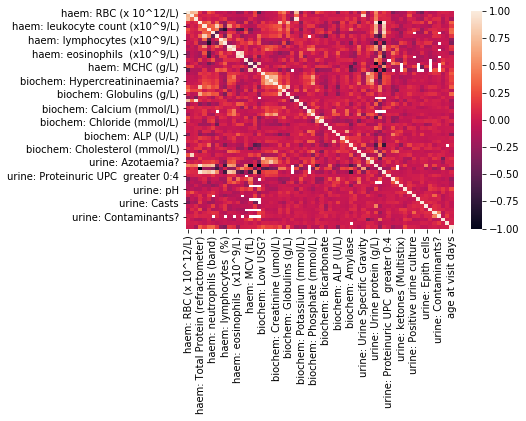

In [82]:
import seaborn as sns
cormat = check_corr_df.corr()
#round(cormat,2)
sns.heatmap(cormat)

In [83]:
upper_corr_mat = cormat.where(
    np.triu(np.ones(cormat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
sorted_mat_df = sorted_mat.to_frame(name='correlation')

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [84]:
sorted_mat_df['correlation abs'] = np.abs(sorted_mat_df['correlation'])

In [88]:
sorted_mat_df[sorted_mat_df['correlation abs'] > 0.8].sort_values(by = 'correlation abs', ascending = False)

correlation  \
urine: urine creatinine (umol/l)    haem: Total Protein (refractometer)    -1.000000   
urine: Urine protein (g/L)          haem: Total Protein (refractometer)     1.000000   
urine: Protein:creatinine ratio     haem: Total Protein (refractometer)     1.000000   
biochem: Haematocrit (%)            haem: HCT (%)                           0.980644   
urine: Urine protein (g/L)          haem: MCH (pg)                         -0.979809   
                                    haem: MCV (fL)                         -0.921730   
urine: Urine Specific Gravity       haem: haemoglobin (g/L)                 0.902753   
haem: eosinophils (%)               haem: eosinophils  (x10^9/L)            0.887506   
urine: Protein:creatinine ratio     haem: neutrophils (band)                0.884727   
haem: neutrophils(seg) (x10^9/L)    haem: leukocyte count (x10^9/L)         0.865467   
haem: monocytes (%)                 haem: monocytes (x10^9/L)               0.841687   
biochem: Globulins (g/L)            biochem: Total Plasma Protein (g/L)     0.840865   
biochem: Total Plasma Protein (g/L) haem: Total Protein (refractometer)     0.827698   
urine: Protein:creatinine ratio     haem: monocytes (x10^9/L)               0.826581   
haem: lymphocytes  (%)              haem: neutrophils (%)                  -0.821273   
urine: Protein:creatinine ratio     haem: leukocyte count (x10^9/L)         0.815837   
urine: Azotaemia?                   biochem: Hypercreatininaemia?           0.809551   
urine: Low USG?                     biochem: Low USG?                       0.807748   
haem: MCH (pg)                      haem: MCV (fL)                          0.800932   

                                                                         correlation abs  
urine: urine creatinine (umol/l)    haem: Total Protein (refractometer)         1.000000  
urine: Urine protein (g/L)          haem: Total Protein (refractometer)         1.000000  
urine: Protein:creatinine ratio     haem: Total Protein (refractometer)         1.000000  
biochem: Haematocrit (%)            haem: HCT (%)                               0.980644  
urine: Urine protein (g/L)          haem: MCH (pg)                              0.979809  
                                    haem: MCV (fL)                              0.921730  
urine: Urine Specific Gravity       haem: haemoglobin (g/L)                     0.902753  
haem: eosinophils (%)               haem: eosinophils  (x10^9/L)                0.887506  
urine: Protein:creatinine ratio     haem: neutrophils (band)                    0.884727  
haem: neutrophils(seg) (x10^9/L)    haem: leukocyte count (x10^9/L)             0.865467  
haem: monocytes (%)                 haem: monocytes (x10^9/L)                   0.841687  
biochem: Globulins (g/L)            biochem: Total Plasma Protein (g/L)         0.840865  
biochem: Total Plasma Protein (g/L) haem: Total Protein (refractometer)         0.827698  
urine: Protein:creatinine ratio     haem: monocytes (x10^9/L)                   0.826581  
haem: lymphocytes  (%)              haem: neutrophils (%)                       0.821273  
urine: Protein:creatinine ratio     haem: leukocyte count (x10^9/L)             0.815837  
urine: Azotaemia?                   biochem: Hypercreatininaemia?               0.809551  
urine: Low USG?                     biochem: Low USG?                           0.807748  
haem: MCH (pg)                      haem: MCV (fL)                              0.800932

# Random forest

In [64]:
import sklearn
sklearn.__version__

'0.24.2'

In [65]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=0)

In [66]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(cols_x, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False) #.plot(kind='bar', rot=45)

,Gini-importance
biochem: Hypercreatininaemia?_intercept,0.039592
biochem: Hypercreatininaemia?_grad,0.030217
biochem: Creatinine (umol/L)_grad,0.025972
haem: neutrophils (band)_intercept,0.024439
haem: neutrophils(seg) (x10^9/L)_grad,0.019501
biochem: Low USG?_grad,0.019468
biochem: Total Plasma Protein (g/L)_grad,0.017943
haem: MCH (pg)_intercept,0.017480
haem: neutrophils (band)_grad,0.017067
biochem: Bicarbonate_grad,0.016838


In [67]:
importances['Gini-importance'].sum()

1.0

<div style='color: FloralWhite; padding: 2rem; background-image: radial-gradient(farthest-corner at 40px 40px,
      #008080 0%, #4fb 100%); font-weight: 500'>
<h2 style='padding: 0; margin-bottom: 1rem; margin-top:0;'> Next Steps </h2> 
<li> Look at correlations {done}</li>
<li> Do PCA then try to disentangle components  https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com CONTINUE HERE!</li>
<li> Plot cumulative explained variance as function of number of PCs shown here https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db</li>
<li> recreate step 2 here: https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/ </li>
<li> Make a validation set/ cross validate </li>


</div>

# PCA on grad/intercept 
What are the grads/intercepts that explain the most variance? 

In [101]:
import sklearn.datasets, sklearn.decomposition

X = X_train
mu = np.mean(X, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(X)

nComp = 10
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

print(Xhat[0,])

[ 0.51347576  0.11347136  0.56661691  0.6555347   0.19166093  0.76637898
  0.22649716  0.22816275  0.15147405  0.29580502  0.06944792  0.17012828
  0.07070341  0.10287777  0.34674487  0.1489429   0.6847289   0.35652987
 -0.01946933  0.12128011  0.02483434  0.05649083  0.32979614  0.43380211
  0.34732333 -0.00681538  0.4974397   0.06614461  0.47870665 -0.00083628
  0.14366707  0.46258897  0.50157314  0.38264259  0.01277124  0.01015276
  0.02268129  0.01971127  0.02523581  0.30609725  0.06536697  0.02124326
  0.05647382  0.55828928 -0.00198001  0.02878529  0.27400805  0.11187536
  0.02301241  0.01940256  0.01660255  0.07023339  0.53209674 -0.04557416
  0.21096776  0.01691351  0.07982542  0.04625795  0.47164417  0.71916476
  0.19919822  0.0260393   0.02098094  0.41588713]


In [102]:
print(X_train[0,])

[4.09890110e-01 1.23583934e-01 6.35416667e-01 5.92760181e-01
 1.06986028e-01 7.59259259e-01 1.81063123e-01 7.44047619e-02
 8.77551020e-02 2.72727273e-01 3.83141762e-02 1.57894737e-01
 4.84848485e-02 1.28571429e-01 3.86392010e-01 1.34615385e-01
 5.83877996e-01 4.16666667e-01 0.00000000e+00 1.14049587e-01
 0.00000000e+00 7.37808740e-02 3.08943089e-01 4.53333333e-01
 3.10000000e-01 0.00000000e+00 5.09090909e-01 4.01785714e-02
 4.90196078e-01 0.00000000e+00 1.16847826e-01 5.24193548e-01
 5.16666667e-01 3.32786885e-01 1.15141956e-02 0.00000000e+00
 1.84983678e-02 1.62074554e-02 1.27659574e-02 2.63297151e-01
 7.76315789e-02 1.33136095e-02 3.04307116e-02 5.00000000e-01
 0.00000000e+00 1.15079365e-04 9.84783641e-02 5.11642950e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.00000000e-01 1.50000000e-02 5.00000000e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.00000000e-01 5.00000000e-01
 5.00000000e-01 0.00000000e+00 0.00000000e+00 4.59284425e-01]


In [98]:
Xhat.shape

(940, 64)

In [99]:
X_train.shape

(940, 64)

In [104]:
pca.transform(X).shape

(940, 64)

In [103]:
pca.components_.shape

(64, 64)

# PCA mother fuckerrrrrrr

In [68]:
X = data_scaled.loc[:, cols_we_want].values
y = data_scaled['CKD - cause of mortality'].values

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 